In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
Heart = pd.read_csv("Heart Disease data.csv")

In [3]:
Heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
Heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
Heart["sex"].value_counts()

1    713
0    312
Name: sex, dtype: int64

In [6]:
Heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
output=Heart.groupby('target').size()
output

target
0    499
1    526
dtype: int64

In [9]:
def heart_disease(row):
    if row==0:
        return 'Absence'
    elif row==1:
        return 'Presence'

In [10]:
Heart['Heart_Disease']=Heart['target'].apply(heart_disease)
Heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence


In [11]:
HD = Heart.groupby('Heart_Disease')['target'].count()
HD.head()

Heart_Disease
Absence     499
Presence    526
Name: target, dtype: int64

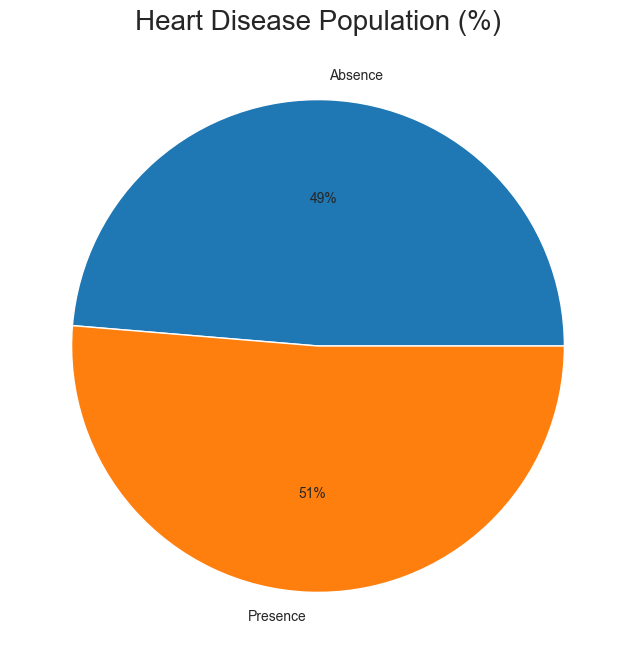

In [12]:
plt.figure(figsize=(12,8))
plt.pie(HD, labels=['Absence','Presence'], autopct='%0.0f%%')
plt.title('Heart Disease Population (%)', fontsize=20)
plt.show()


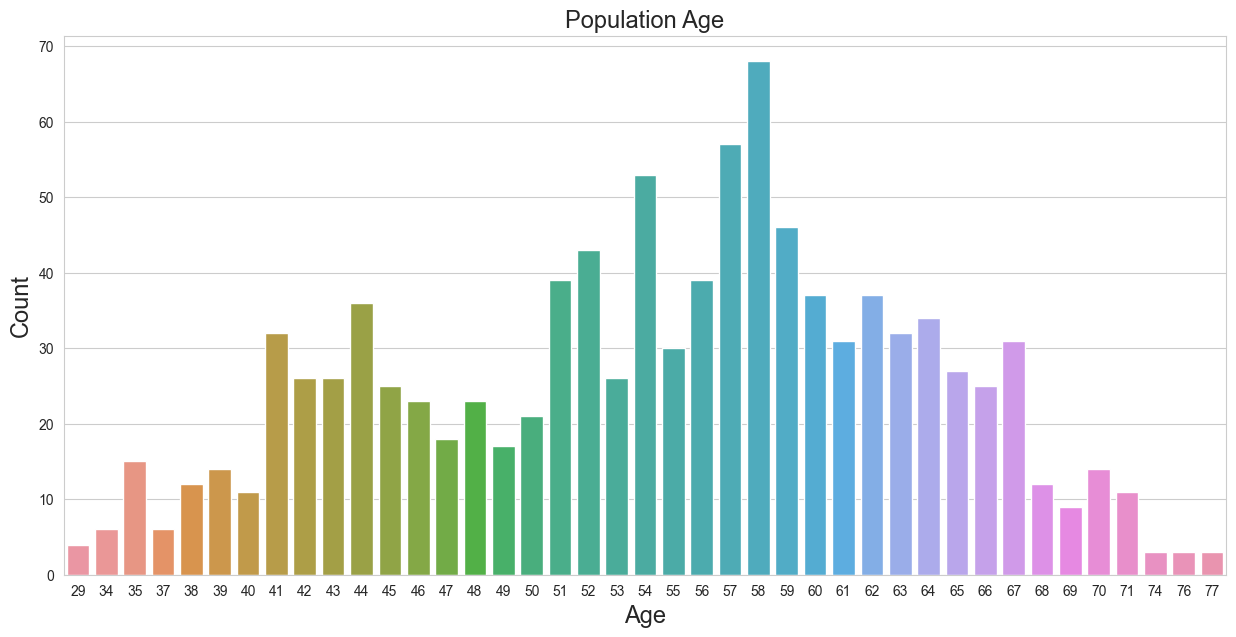

In [13]:
plt.figure(figsize=(15,7))
sns.countplot(x='age', data=Heart)
plt.title('Population Age', fontsize=17)
plt.xlabel('Age', fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.show()

In [14]:
Min_Age=Heart['age'].min()
Max_Age=Heart['age'].max()
Mean_Age=Heart['age'].mean()
print("Minimum Age :>",Min_Age)
print("Maximum Age :>",Max_Age)
print("Mean Age :>",Mean_Age)

Minimum Age :> 29
Maximum Age :> 77
Mean Age :> 54.43414634146342


In [15]:
Young_Ages=Heart[(Heart['age']>=29) & (Heart['age']<40)]
Middle_Ages=Heart[(Heart['age']>=40) & (Heart['age']<55)]
Senior_Ages=Heart[(Heart['age']>55)]
print('Young Ages =>',len(Young_Ages))
print('Middle Ages =>',len(Middle_Ages))
print('Senior Ages =>',len(Senior_Ages))

Young Ages => 57
Middle Ages => 419
Senior Ages => 519


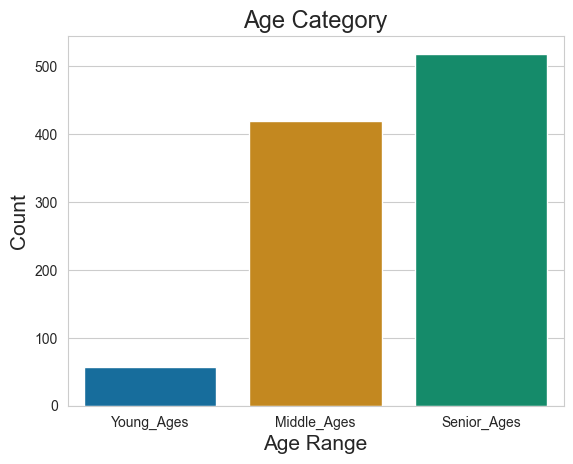

In [16]:
sns.barplot(x=['Young_Ages','Middle_Ages','Senior_Ages'], y=[len(Young_Ages), len(Middle_Ages), len(Senior_Ages)], palette= "colorblind")
plt.title('Age Category', fontsize=17)
plt.xlabel('Age Range', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [17]:
def gender(row):
    if row==1:
        return 'Male'
    elif row==0:
        return 'Female'

In [18]:
Heart['sex1']=Heart['sex'].apply(gender)

In [19]:
Heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,sex1
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence,Male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence,Male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence,Male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence,Male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence,Female


In [20]:
def age_range(row):
    if row>=29 and row<40:
        return 'Young Age'
    elif row>=40 and row<55:
        return 'Middle Age'
    elif row>55:
        return 'Senior Age'

In [21]:
Heart['Age_Range']=Heart['age'].apply(age_range)
Heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,sex1,Age_Range
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence,Male,Middle Age
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence,Male,Middle Age
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence,Male,Senior Age
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence,Male,Senior Age
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence,Female,Senior Age


C:\Users\Vimal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3544: UserWarning: 10.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Vimal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3544: UserWarning: 13.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Vimal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3544: UserWarning: 23.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Vimal\AppData\Local\Packages\Py

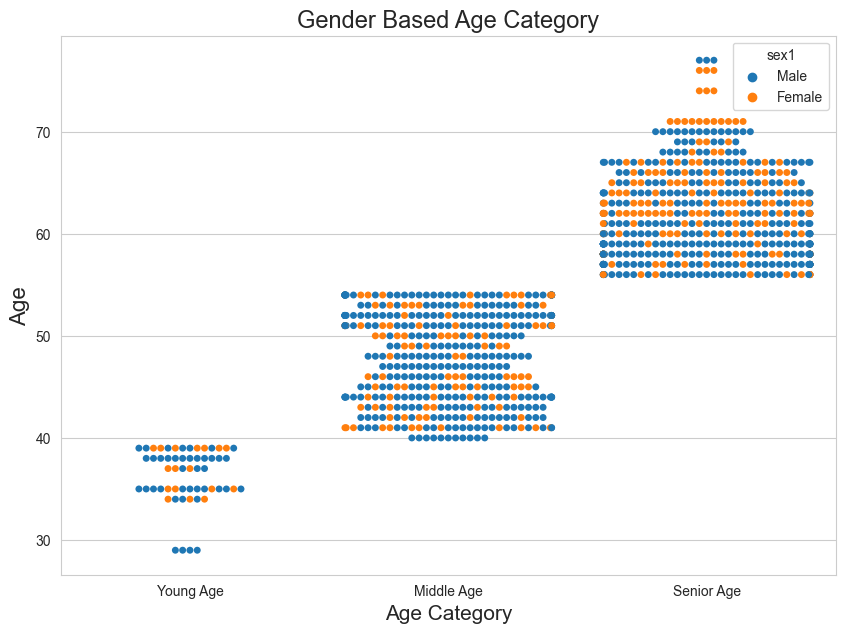

In [22]:
plt.figure(figsize=(10,7))
sns.swarmplot(x='Age_Range', y='age', hue='sex1', data=Heart, order= ['Young Age','Middle Age','Senior Age'])
plt.title('Gender Based Age Category', fontsize=17)
plt.xlabel('Age Category', fontsize=15)
plt.ylabel('Age', fontsize=16)
plt.show()

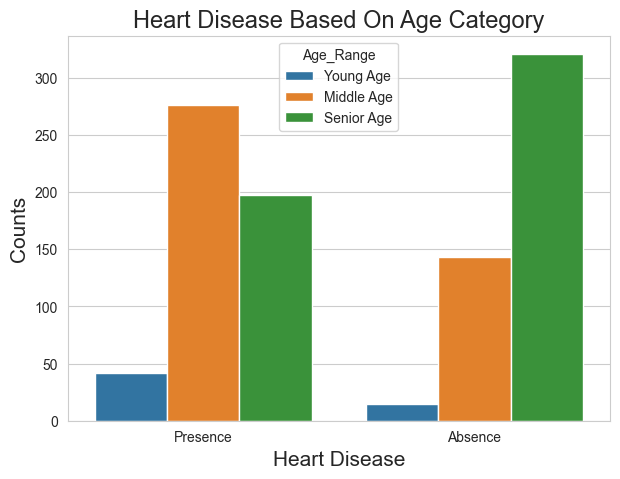

In [23]:
plt.figure(figsize=(7,5))
hue_order=['Young Age', 'Middle Age', 'Senior Age']
sns.countplot(x='Heart_Disease', hue='Age_Range', data=Heart, order=['Presence','Absence'], hue_order=hue_order,)
plt.title('Heart Disease Based On Age Category', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

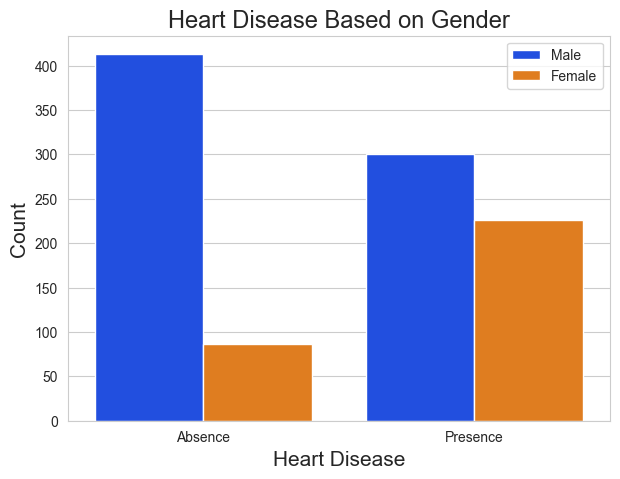

In [24]:
plt.figure(figsize=(7,5))
sns.countplot(x=Heart['Heart_Disease'], hue='sex1', data=Heart, palette='bright')
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(labels=['Male','Female'])
plt.title('Heart Disease Based on Gender',fontsize=17)
plt.show()

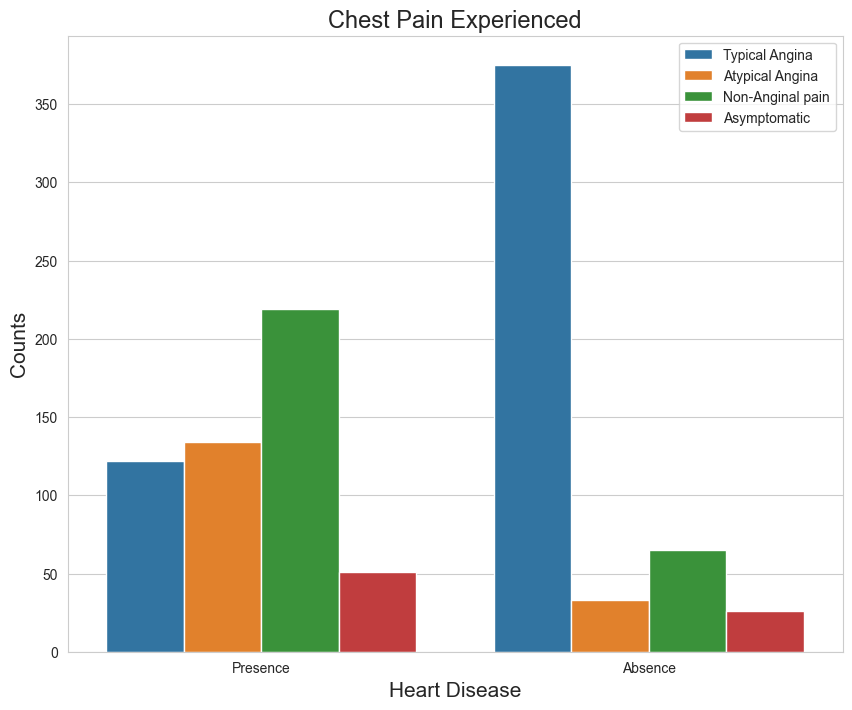

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(x=Heart['Heart_Disease'], hue='cp', data=Heart, order=['Presence','Absence'])
plt.title('Chest Pain Experienced', fontsize=17)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

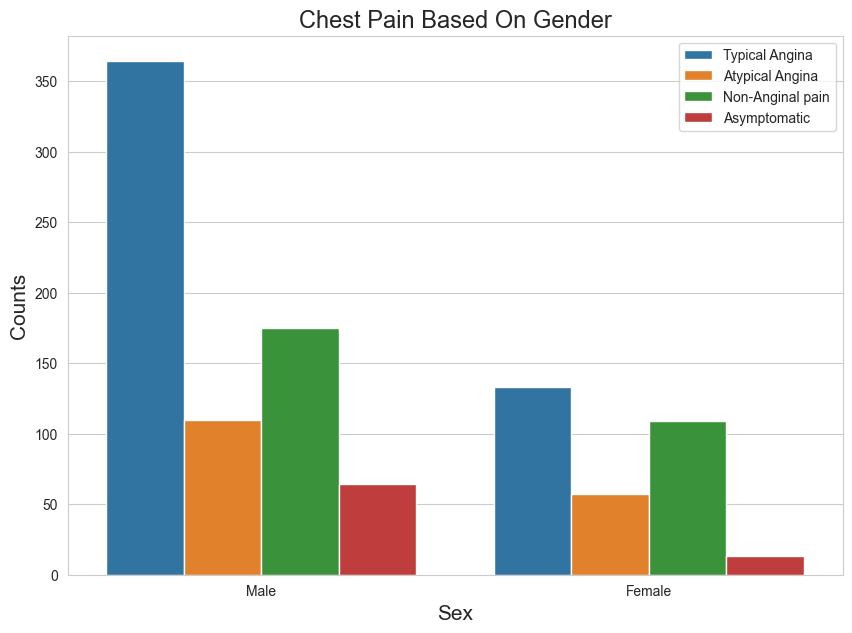

In [25]:
plt.figure(figsize=(10,7))
sns.countplot(x=Heart['sex1'], hue='cp', data=Heart)
plt.title('Chest Pain Based On Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

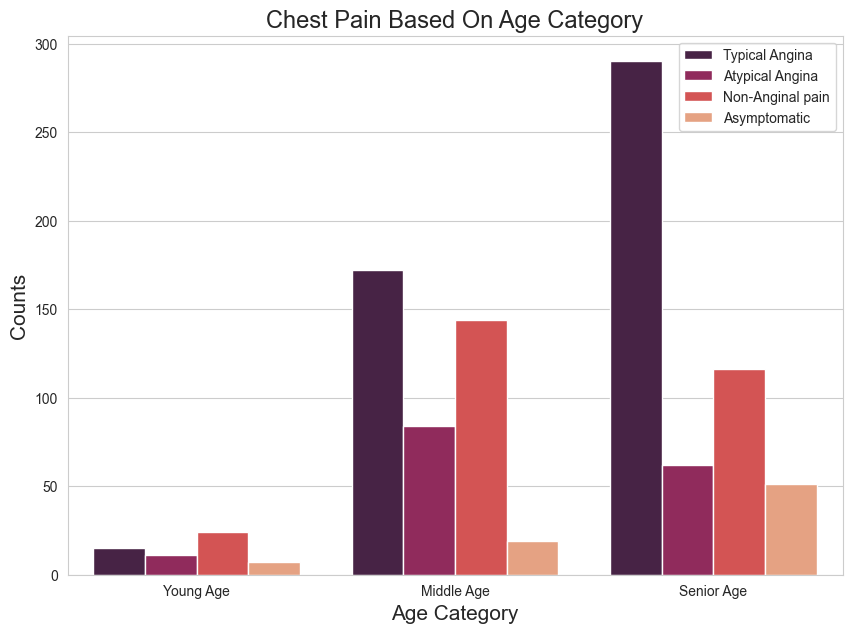

In [27]:
plt.figure(figsize=(10,7))
sns.countplot(x=Heart['Age_Range'], hue='cp', data=Heart, order=['Young Age', 'Middle Age', 'Senior Age'], palette='rocket')
plt.title('Chest Pain Based On Age Category', fontsize=17)
plt.xlabel('Age Category', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

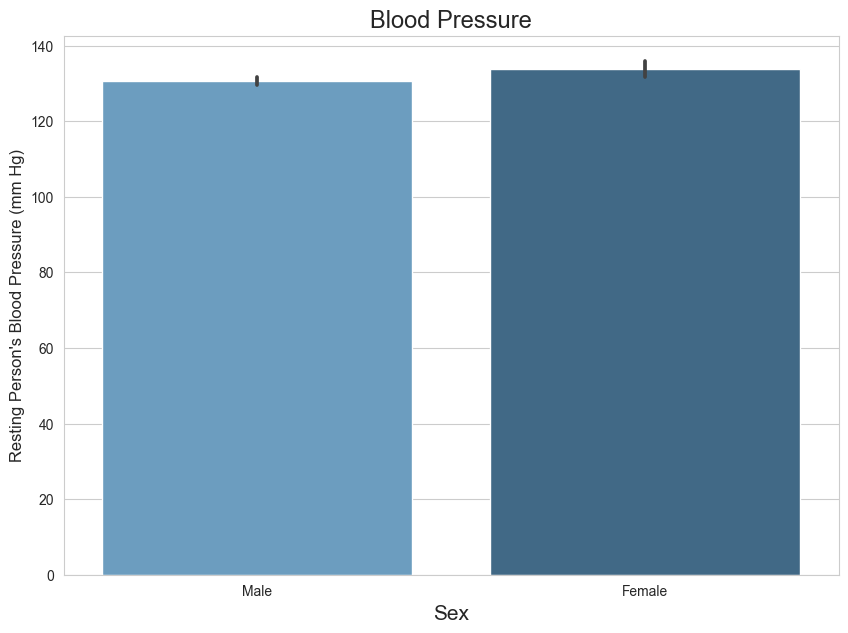

In [29]:
plt.figure(figsize=(10,7))
sns.barplot(x='sex1', y='trestbps', data=Heart, palette='Blues_d')
plt.title("Blood Pressure", fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Resting Person's Blood Pressure (mm Hg)", fontsize=12)
plt.show()

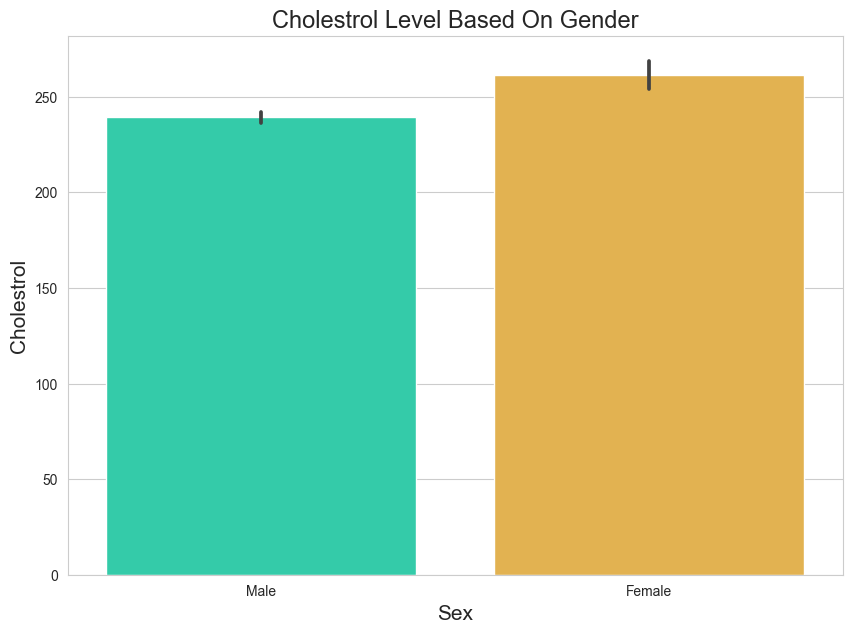

In [30]:
plt.figure(figsize=(10,7))
sns.barplot(x='sex1', y='chol', data=Heart, palette='turbo')
plt.title("Cholestrol Level Based On Gender", fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Cholestrol", fontsize=15)
plt.show()

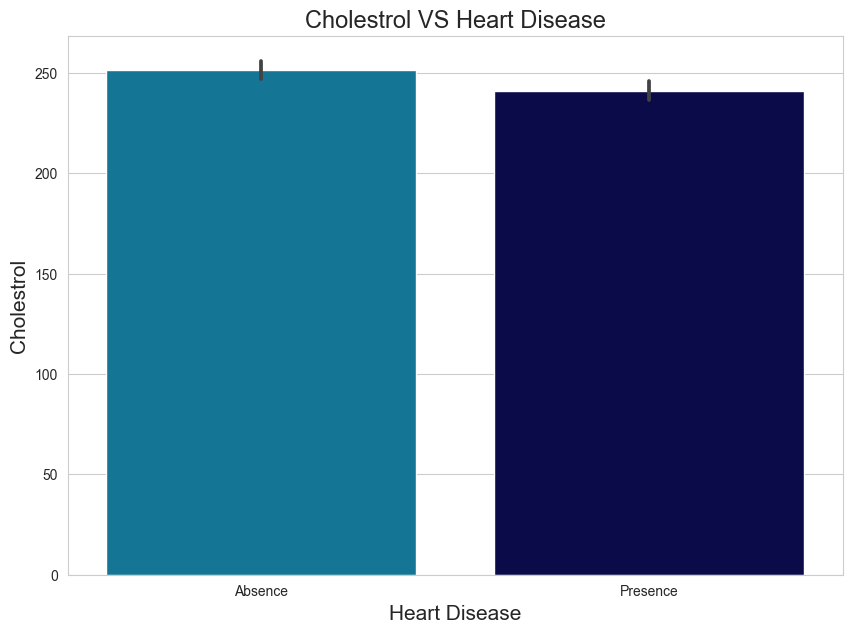

In [31]:
plt.figure(figsize=(10,7))
sns.barplot(x='Heart_Disease', y='chol', data=Heart, palette='ocean_r')
plt.title('Cholestrol VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

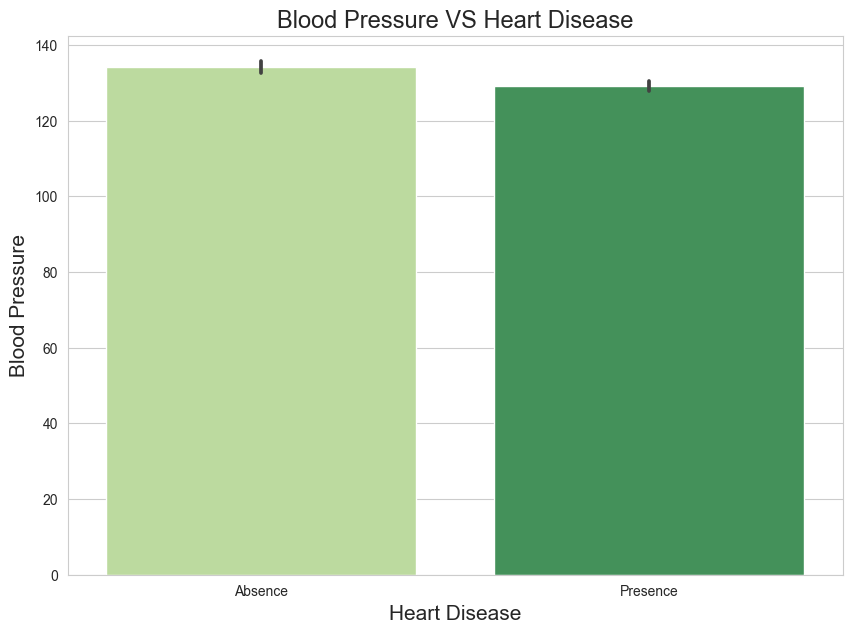

In [33]:
plt.figure(figsize=(10,7))
sns.barplot(x='Heart_Disease', y='trestbps', data=Heart, palette='YlGn')
plt.title('Blood Pressure VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Blood Pressure', fontsize=15)
plt.show()

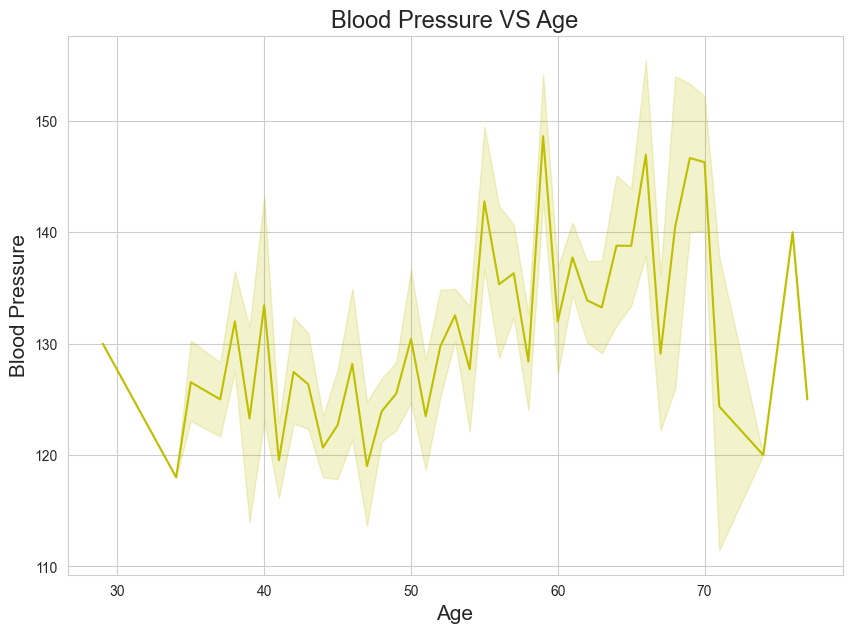

In [34]:
plt.figure(figsize=(10,7))
sns.lineplot(x='age', y='trestbps', data=Heart, color='y')
plt.title('Blood Pressure VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Blood Pressure', fontsize=15)
plt.show()

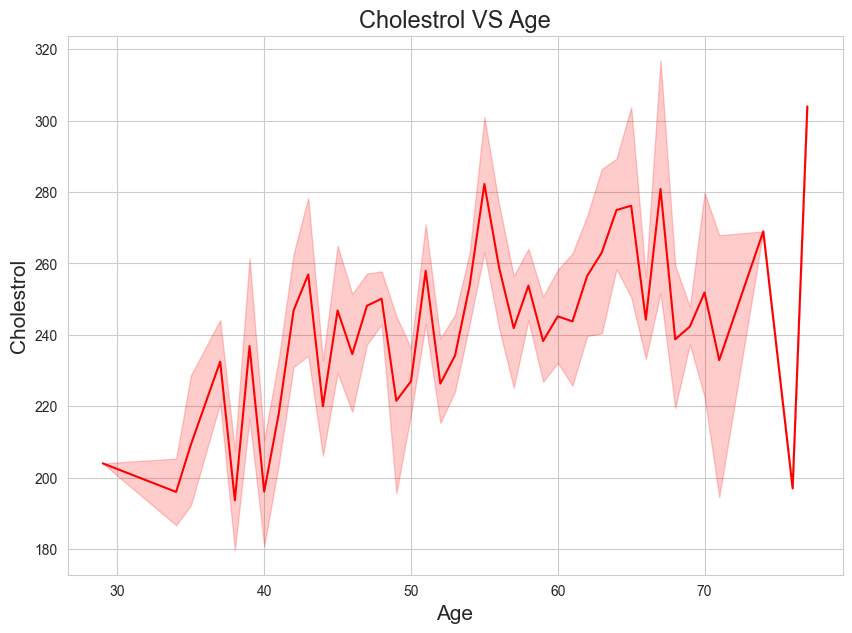

In [35]:
plt.figure(figsize=(10,7))
sns.lineplot(x='age', y='chol', data=Heart, color='r')
plt.title('Cholestrol VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

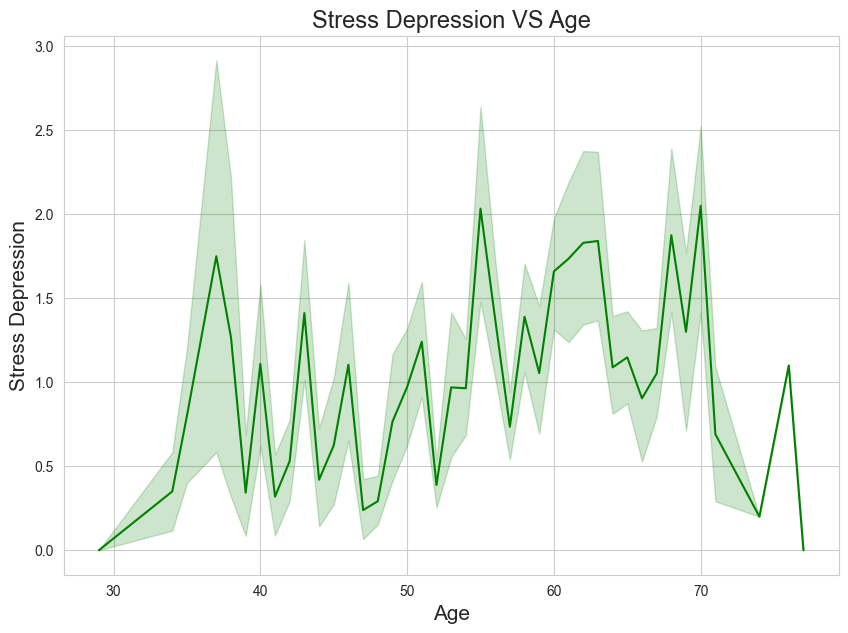

In [36]:
plt.figure(figsize=(10,7))
sns.lineplot(x='age', y='oldpeak', data=Heart, color='g')
plt.title('Stress Depression VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Stress Depression', fontsize=15)
plt.show()

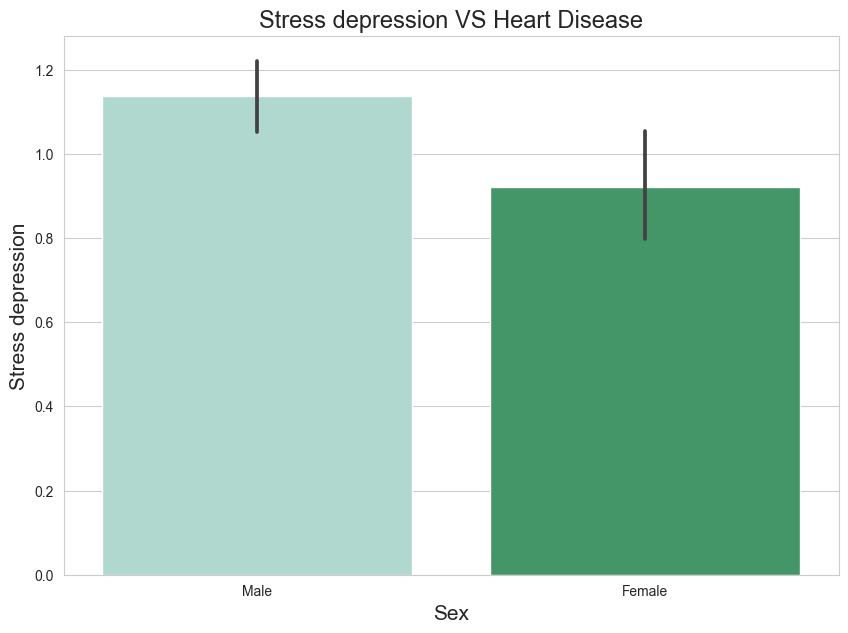

In [37]:
plt.figure(figsize=(10,7))
sns.barplot(x='sex1', y='oldpeak', data=Heart, palette='BuGn')
plt.title('Stress depression VS Heart Disease', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Stress depression', fontsize=15)
plt.show()

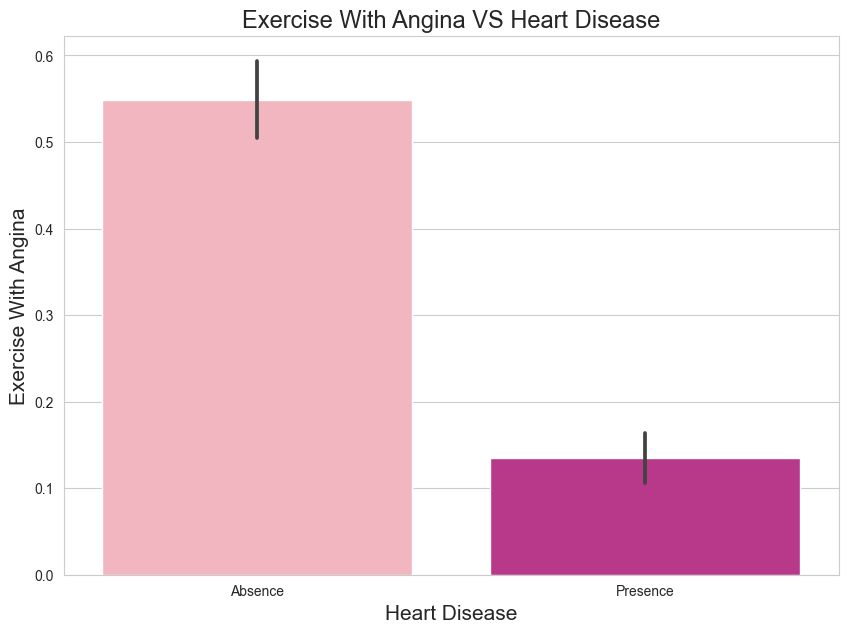

In [39]:
plt.figure(figsize=(10,7))
sns.barplot(x='Heart_Disease', y='exang', data=Heart, palette='RdPu')
plt.title('Exercise With Angina VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Exercise With Angina', fontsize=15)
plt.show()

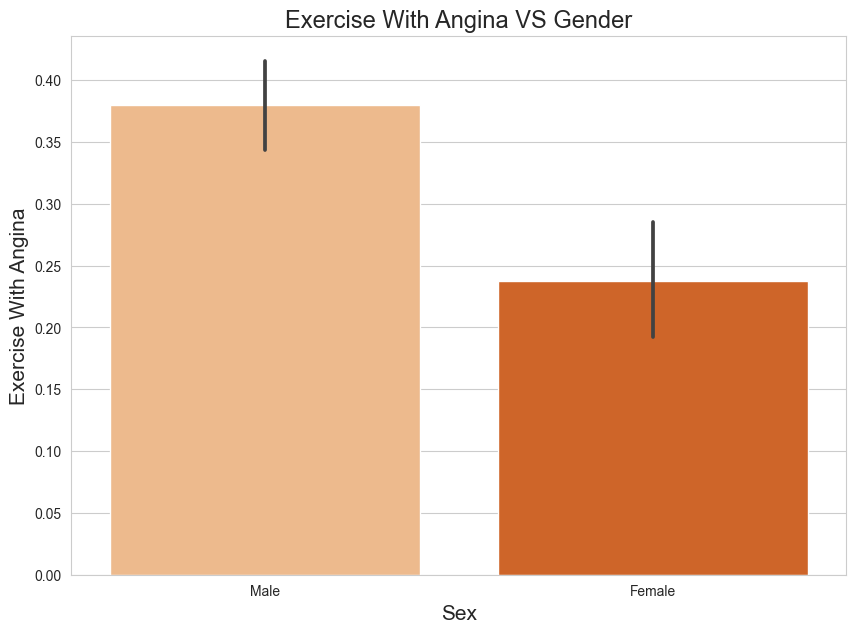

In [40]:
plt.figure(figsize=(10,7))
sns.barplot(x='sex1', y='exang', data=Heart, palette='Oranges')
plt.title('Exercise With Angina VS Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Exercise With Angina', fontsize=15)
plt.show()

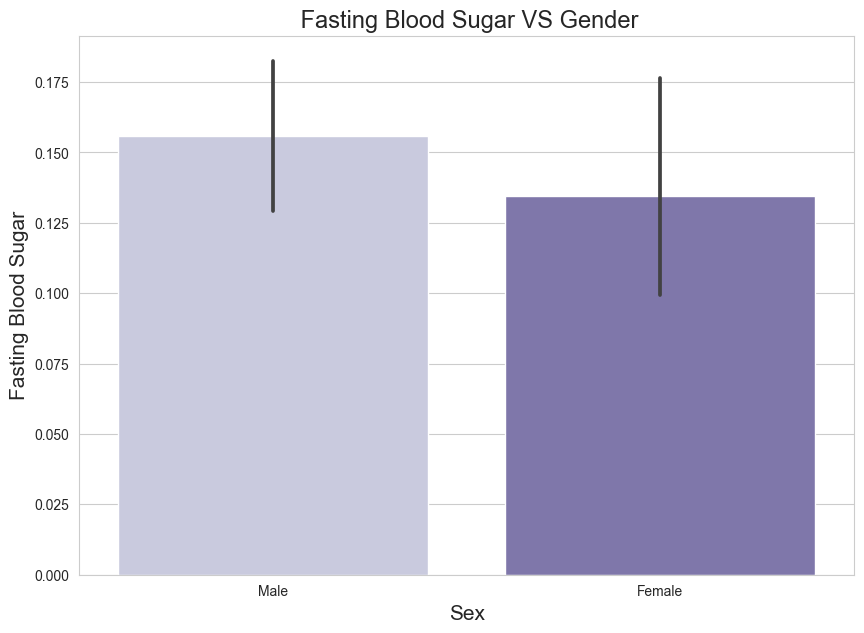

In [41]:
plt.figure(figsize=(10,7))
sns.barplot(y='fbs', x='sex1', data=Heart, palette='Purples')
plt.title(' Fasting Blood Sugar VS Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Fasting Blood Sugar', fontsize=15)
plt.show()

C:\Users\Vimal\AppData\Local\Temp\ipykernel_26420\3747363950.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Heart.corr(),annot=True, linewidth=3)


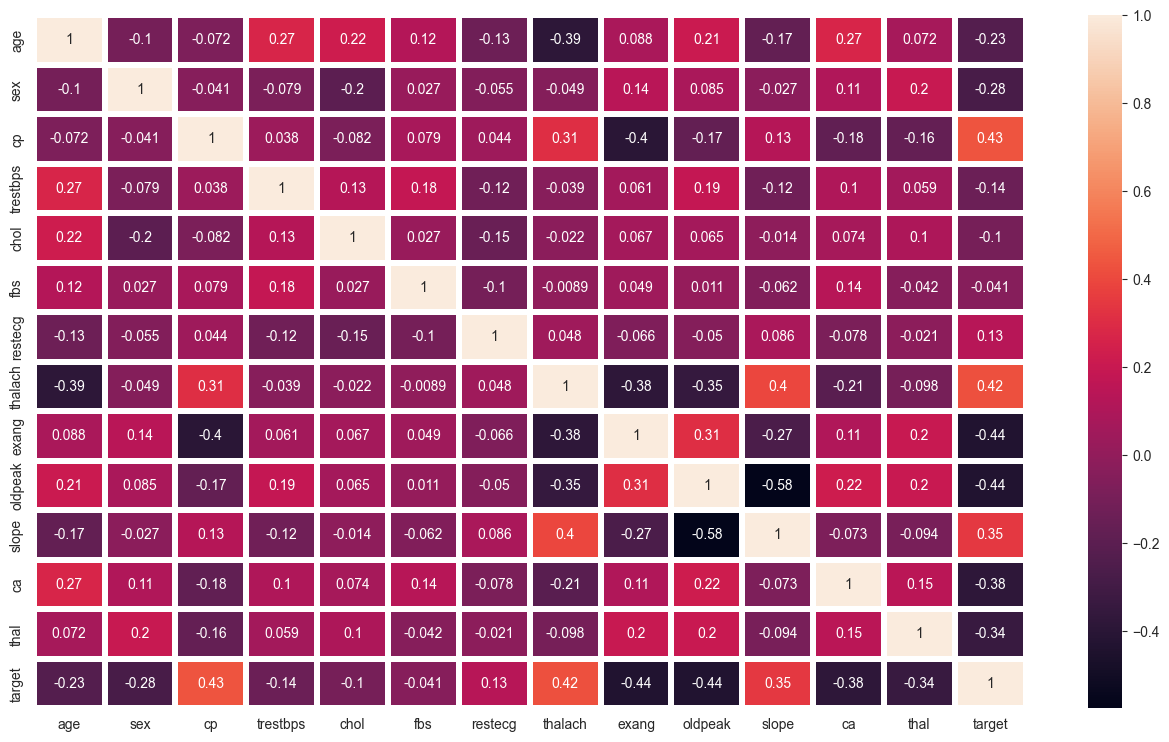

In [42]:
plt.figure(figsize=(16,9))
sns.heatmap(Heart.corr(),annot=True, linewidth=3)
plt.show()